# Programmers Dev Match : 미술 작품 분류하기 프로젝트

- 이미지 입력 크기 : 3(Channel) * 227(Width) * 227(Height)

In [64]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt

import os
import zipfile

import random

In [65]:
# 다운로드 받은 이미지 압축 파일 해제
local_zip = './train.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/train')
zip_ref.close()

local_zip = './test.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/test')
zip_ref.close()

In [78]:
# 훈련 이미지 디렉토리 설정

base_dir = './tmp'

train_dir = os.path.join(base_dir, 'train/train/')
validation_dir = os.path.join(base_dir, 'test/test/0/')

In [67]:
# train/test 경로에 따른 이미지 파일 확인
# training image 폴더명 : 파일명 형태로 정리
train_file = {}
val_file = os.listdir(validation_dir)
for folder in os.listdir(train_dir):
    train_file[folder] = os.listdir(train_dir + folder)
        
print(len(os.listdir(validation_dir)))
print(os.listdir(train_dir))

350
['house', 'giraffe', 'person', 'dog', 'elephant', 'horse', 'guitar']


In [68]:
%matplotlib inline
import matplotlib.image as mpimg

# 이미지를 matplotlib를 사용해서 4 * 4 형태의 격자로 출력 예정
nrows = 4
ncols = 4

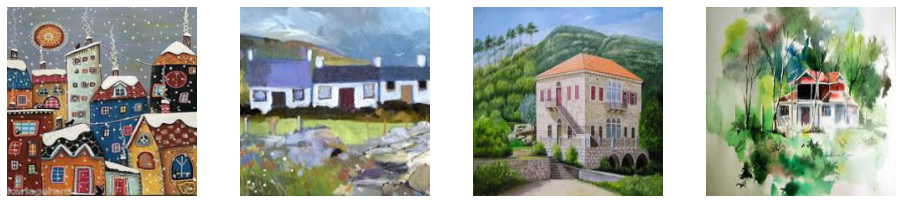

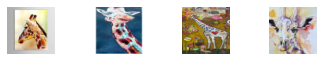

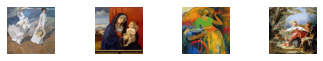

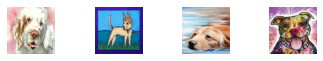

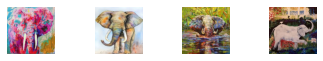

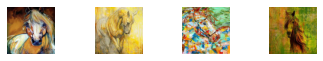

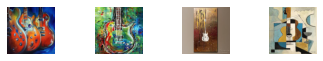

In [89]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for folder_name in os.listdir(train_dir):
    for i, img_path in enumerate(train_file[folder_name][:4]):
        sp = plt.subplot(nrows, ncols, i + 1)
        sp.axis('Off')
        img = mpimg.imread(train_dir + folder_name + "/" + img_path)
        plt.imshow(img)

    plt.show()

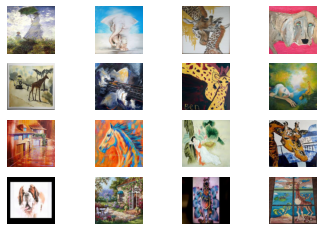

In [90]:
# validation image show
for i, img_path in enumerate(val_file[:16]):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    img = mpimg.imread(validation_dir + img_path)
    plt.imshow(img)

plt.show()

In [98]:
## CNN 다중 분류 이미지 sample test

import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	train_dir,
	target_size=(227,227),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	'./tmp/test/test',
	target_size=(227,227),
	class_mode='categorical',
  batch_size=126
)


Found 1698 images belonging to 7 classes.
Found 350 images belonging to 1 classes.


In [99]:
model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(227, 227, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 225, 225, 64)      1792      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 110, 110, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 55, 55, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 53, 53, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 128)      

In [101]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=10, validation_data = validation_generator, verbose = 1, validation_steps=3)

Epoch 1/25
10/10 [==============================] - 14s 1s/step - loss: 1.8992 - accuracy: 0.2236 - val_loss: 13.8236 - val_accuracy: 0.0000e+00
Epoch 2/25
10/10 [==============================] - 14s 1s/step - loss: 1.9020 - accuracy: 0.2317 - val_loss: 13.8835 - val_accuracy: 0.0914
Epoch 3/25
10/10 [==============================] - 13s 1s/step - loss: 1.9830 - accuracy: 0.2186 - val_loss: 14.0410 - val_accuracy: 0.0000e+00
Epoch 4/25
10/10 [==============================] - 14s 1s/step - loss: 1.9062 - accuracy: 0.2349 - val_loss: 13.9488 - val_accuracy: 0.0000e+00
Epoch 5/25
10/10 [==============================] - 14s 1s/step - loss: 1.8569 - accuracy: 0.2460 - val_loss: 14.6761 - val_accuracy: 0.2943
Epoch 6/25
10/10 [==============================] - 13s 1s/step - loss: 2.0176 - accuracy: 0.2219 - val_loss: 14.0083 - val_accuracy: 0.0143
Epoch 7/25
10/10 [==============================] - 14s 1s/step - loss: 1.8970 - accuracy: 0.2413 - val_loss: 14.3917 - val_accuracy: 0.9686
E

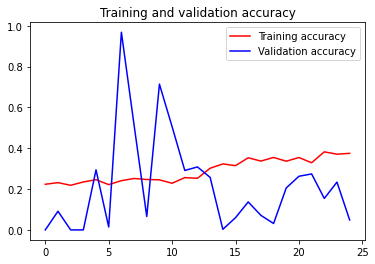

<Figure size 432x288 with 0 Axes>

In [103]:
# CNN 단순 모델을 활용했을 때의 첫번째 학습 결과 확인하기
# 결과를 보면 알 수 있지만, 적용 결과가 개판이다.

# 적용 방향성을 우선 단순하게 CNN을 사용해서 훈련시켰을 때의 훈련 & 검증 정확도를 높이고

# 그 다음에 논문 등을 참고하면서 더 효율성 좋은 모델을 적용하면 될 것 같다.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()